<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Autentificación-de-la-API-de-Spotipy" data-toc-modified-id="Autentificación-de-la-API-de-Spotipy-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Autentificación de la API de Spotipy</a></span></li><li><span><a href="#Llamada-a-la-API" data-toc-modified-id="Llamada-a-la-API-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Llamada a la API</a></span><ul class="toc-item"><li><span><a href="#Llamada-usando-el-URI-de-la-Playlist" data-toc-modified-id="Llamada-usando-el-URI-de-la-Playlist-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Llamada usando el URI de la Playlist</a></span></li><li><span><a href="#Sacamos-la-info-de-la-playlist" data-toc-modified-id="Sacamos-la-info-de-la-playlist-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Sacamos la info de la playlist</a></span></li><li><span><a href="#Sacamos-la-información-de-las-canciones" data-toc-modified-id="Sacamos-la-información-de-las-canciones-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Sacamos la información de las canciones</a></span><ul class="toc-item"><li><span><a href="#Quién-añadió-la-canción" data-toc-modified-id="Quién-añadió-la-canción-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Quién añadió la canción</a></span></li><li><span><a href="#Nombre-de-la-canción" data-toc-modified-id="Nombre-de-la-canción-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Nombre de la canción</a></span></li><li><span><a href="#Popularidad-de-la-canción" data-toc-modified-id="Popularidad-de-la-canción-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Popularidad de la canción</a></span></li><li><span><a href="#Nombre-del-artista" data-toc-modified-id="Nombre-del-artista-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Nombre del artista</a></span></li><li><span><a href="#Es-una-canción-explicita" data-toc-modified-id="Es-una-canción-explicita-2.3.5"><span class="toc-item-num">2.3.5&nbsp;&nbsp;</span>Es una canción explicita</a></span></li><li><span><a href="#URI-de-la-canción,-es-como-sel-DNI-de-la-canción" data-toc-modified-id="URI-de-la-canción,-es-como-sel-DNI-de-la-canción-2.3.6"><span class="toc-item-num">2.3.6&nbsp;&nbsp;</span>URI de la canción, es como sel DNI de la canción</a></span></li><li><span><a href="#Información-sobre-el-album" data-toc-modified-id="Información-sobre-el-album-2.3.7"><span class="toc-item-num">2.3.7&nbsp;&nbsp;</span>Información sobre el album</a></span></li><li><span><a href="#Nombre-de-la-cancion" data-toc-modified-id="Nombre-de-la-cancion-2.3.8"><span class="toc-item-num">2.3.8&nbsp;&nbsp;</span>Nombre de la cancion</a></span></li></ul></li></ul></li><li><span><a href="#Sacar-información-de-cada-una-de-las-canciones" data-toc-modified-id="Sacar-información-de-cada-una-de-las-canciones-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Sacar información de cada una de las canciones</a></span></li><li><span><a href="#Juntamos-los-dos-dataframes-que-nos-hemos-creado-de-las-canciones-y-las-playlist" data-toc-modified-id="Juntamos-los-dos-dataframes-que-nos-hemos-creado-de-las-canciones-y-las-playlist-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Juntamos los dos dataframes que nos hemos creado de las canciones y las playlist</a></span></li></ul></div>

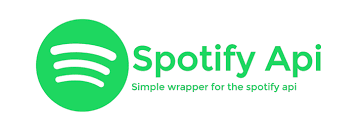

In [176]:
# antes de empezar los instalamos la librería de spotify
#!pip install spotipy

In [3]:
import sys
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np
import os
from dotenv import load_dotenv
load_dotenv()

True

# Autentificación de la API de Spotipy 

In [4]:
# obtenemos los tokens que hemos guardado en nuestro .env

CLIENT_SECRET = os.getenv("secret")
CLIENT_ID = os.getenv("id")


In [5]:
# nos conectamos con la API usando nuestras credenciales. ESTO ES LEY 😉

credenciales = SpotifyClientCredentials(CLIENT_ID, CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager = credenciales)

[Aquí](https://spotipy.readthedocs.io/en/2.19.0/) os dejamos la documentación. 

# Llamada a la API 

Para hacer las llamadas a la API necesitaremos: 

- URI de la Playlist


- URIs de las canciones

## Llamada usando el URI de la Playlist

De donde sacamos el URI de la Playlist? 

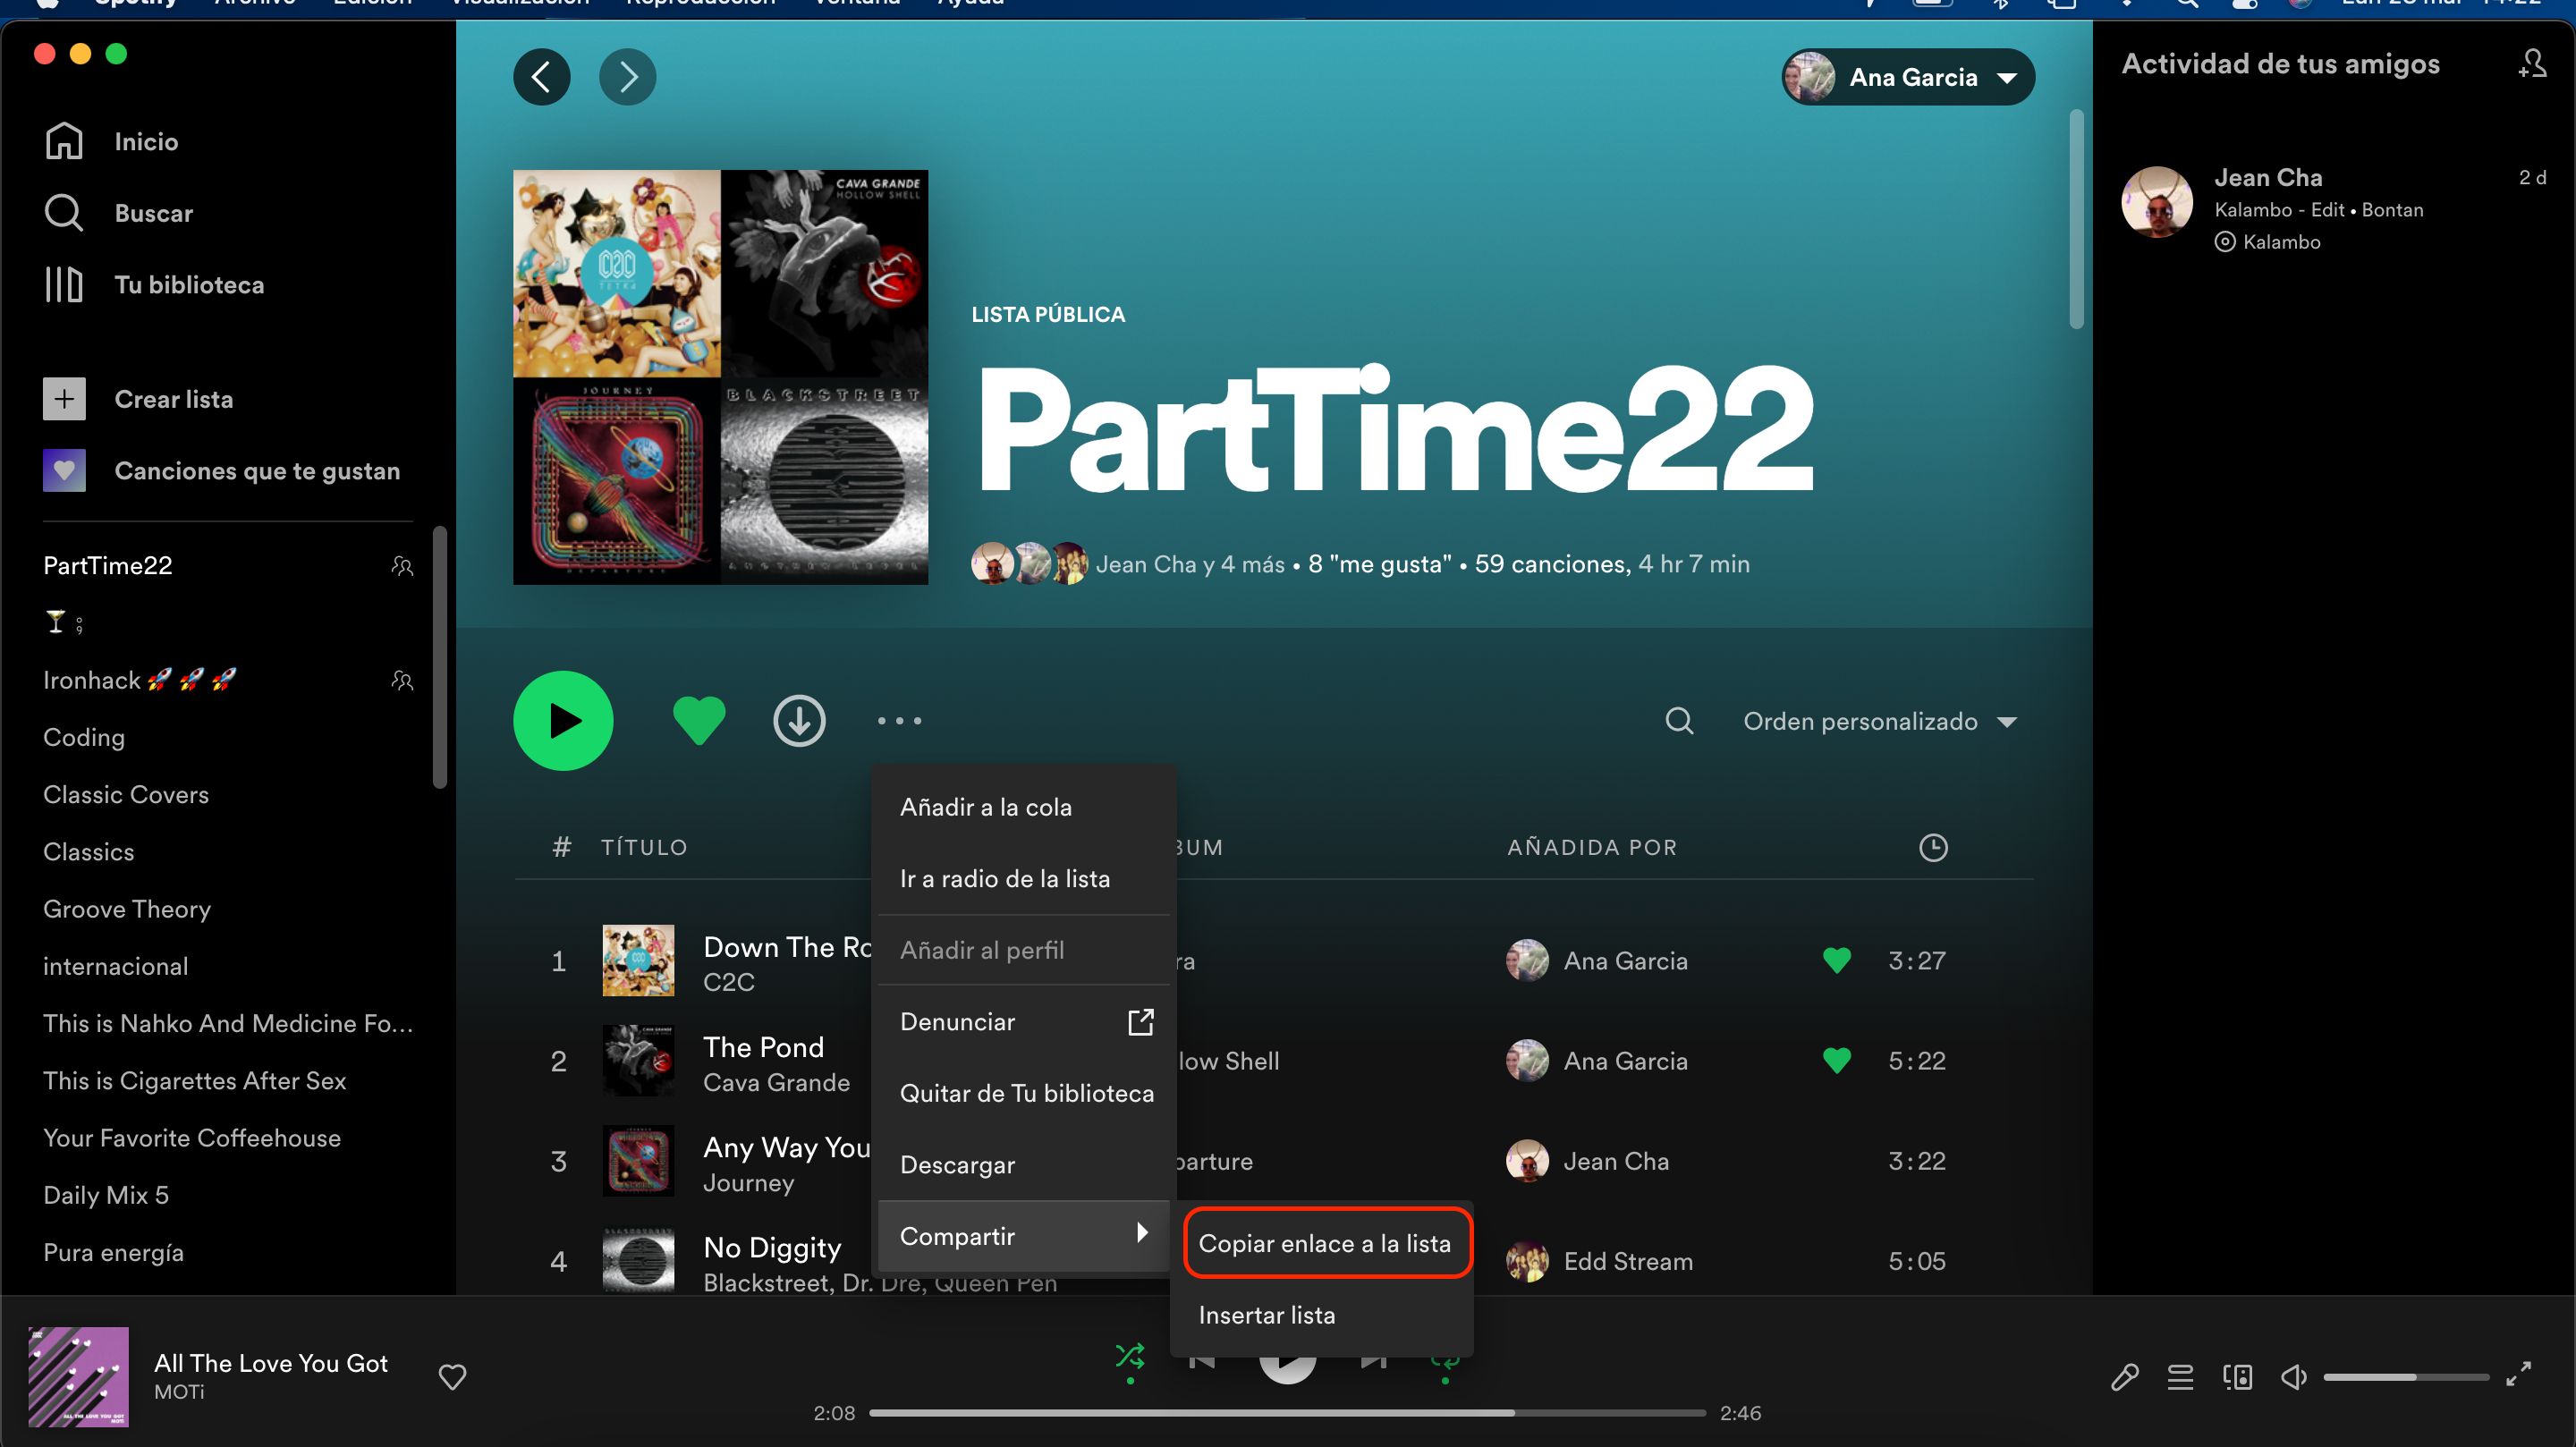

In [6]:
link = "https://open.spotify.com/playlist/6GS523RZPJ8l4zpA1wBrEa?si=f20a3b854bd3488f"

In [7]:
playlist_URI = link.split("/")[-1].split("?")[0]

In [8]:
playlist_URI

'6GS523RZPJ8l4zpA1wBrEa'

## Sacamos la info de la playlist

Para obtener los URIs de las pistas necesitamos obtener todos los tranks de nuestra lista de reproducción. Para ello utilizaremos el método `playlist_tracks`. 

In [9]:
offset = 0
all_data = []
for i in range(2):
    all_data.append(sp.playlist_tracks(playlist_URI, offset=offset)["items"])
    offset += 100

In [184]:
# nos creamos una lista donde almacenaremos los resultados de la llamada a la API. 
all_data = []

# hacemos la llamada a la API
all_data.append(sp.playlist_tracks(playlist_URI)["items"])


Veamos que información tenemos: 

In [185]:
#all_data[0][1]

In [186]:
import pyjsonviewer

pyjsonviewer.view_data(json_data=all_data[0])


## Sacamos la información de las canciones

In [11]:
all_data[0][1].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

### Quién añadió la canción

In [12]:
all_data[0][1]["added_by"]

{'external_urls': {'spotify': 'https://open.spotify.com/user/1183037273'},
 'href': 'https://api.spotify.com/v1/users/1183037273',
 'id': '1183037273',
 'type': 'user',
 'uri': 'spotify:user:1183037273'}

In [13]:
all_data[0][1]["added_by"]["id"]

'1183037273'

**Información sobre las canciones**

In [14]:
# como es un diccionario muy grande y difícil de entender veamos sus keys para saber que información tengo de cada canción. 

all_data[0][1].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

### Nombre de la canción

In [15]:
all_data[0][1]["track"].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

### Popularidad de la canción

In [16]:
all_data[0][1]["track"]["popularity"]

37

### Nombre del artista

In [17]:
all_data[0][58]["track"]["artists"]

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/4dl2as3pdCgkcctBVPhB8A'},
  'href': 'https://api.spotify.com/v1/artists/4dl2as3pdCgkcctBVPhB8A',
  'id': '4dl2as3pdCgkcctBVPhB8A',
  'name': 'Baroque Festival Orchestra',
  'type': 'artist',
  'uri': 'spotify:artist:4dl2as3pdCgkcctBVPhB8A'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/3ti3DSNOdg2yPshkZsriGa'},
  'href': 'https://api.spotify.com/v1/artists/3ti3DSNOdg2yPshkZsriGa',
  'id': '3ti3DSNOdg2yPshkZsriGa',
  'name': 'Alberto Lizzio',
  'type': 'artist',
  'uri': 'spotify:artist:3ti3DSNOdg2yPshkZsriGa'}]

In [18]:
all_data[0][1]["track"]["artists"][0]["name"]

'Cava Grande'

### Es una canción explicita 

In [19]:
all_data[0][1]["track"]["explicit"]

False

### URI de la canción, es como sel DNI de la canción

In [20]:
all_data[0][1]["track"]["uri"]

'spotify:track:0IyuvVFF4mXGi9viEqaEsI'

### Información sobre el album

In [21]:
# información sobre el album
all_data[0][1]["track"]["album"].keys()

dict_keys(['album_type', 'artists', 'available_markets', 'external_urls', 'href', 'id', 'images', 'name', 'release_date', 'release_date_precision', 'total_tracks', 'type', 'uri'])

### Link de la cancion

In [22]:
all_data[0][1]["track"].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

In [23]:
all_data[0][1]["track"]["external_urls"]["spotify"]

'https://open.spotify.com/track/0IyuvVFF4mXGi9viEqaEsI'

### Año de publicación

In [24]:
# en que año se publicó la canción

all_data[0][1]["track"]["album"]["release_date"]

'2021-01-29'

### Nombre de la cancion

In [25]:
all_data[0][1]["track"]["name"]

'The Pond'

**Lo hemos hecho para una canción, es el momento de hacerlo para todas!**

In [26]:
basic_info = {"song": [], "artist": [], "date": [], "explicit": [], "uri": [], "popularity": [], "ironhacker": [], "links": []}

In [27]:
for i in range(len(all_data)): 
    for z in range(len(all_data[i])): 
        artista = []
        try:
            basic_info["uri"].append(all_data[i][z]["track"]["uri"])
            basic_info["song"].append(all_data[i][z]["track"]["name"])
            basic_info["date"].append(all_data[i][z]["track"]["album"]["release_date"])
            basic_info["explicit"].append(all_data[i][z]["track"]["explicit"])
            basic_info["popularity"].append(all_data[i][z]["track"]["popularity"])
            basic_info["ironhacker"].append(all_data[i][z]["added_by"]["id"])
            basic_info["links"].append(all_data[i][z]["track"]["external_urls"]["spotify"])

            
            if len(all_data[i][z]["track"]["artists"]) == 1:
                basic_info["artist"].append(all_data[i][z]["track"]["artists"][0]["name"])
            else:
                for x in range(len(all_data[i][z]["track"]["artists"])):
                    artista.append(all_data[i][z]["track"]["artists"][x]["name"])
                basic_info["artist"].append(artista)
             
        except:
            basic_info["uri"].append(np.nan)
            basic_info["song"].append(np.nan)
            basic_info["date"].append(np.nan)
            basic_info["explicit"].append(np.nan)
            basic_info["popularity"].append(np.nan)
            basic_info["ironhacker"].append(np.nan)
            basic_info["artist"].append(np.nan)


In [28]:
basic_info.keys()

dict_keys(['song', 'artist', 'date', 'explicit', 'uri', 'popularity', 'ironhacker', 'links'])

In [29]:
len(basic_info["artist"])

128

In [30]:
df_basic_info = pd.DataFrame(basic_info)

In [31]:
df_basic_info

song  \
0                                        Down The Road   
1                                             The Pond   
2                                  Any Way You Want It   
3                                           No Diggity   
4                                          Lost on You   
..                                                 ...   
123  Si Mañana Me Muero (feat. Pablo Chill-E, Julia...   
124                                          Hurricane   
125                                         Battleborn   
126                                               Home   
127                                  Tourment d' amour   

                                                artist        date  explicit  \
0                                                  C2C  2012-01-01     False   
1                                          Cava Grande  2021-01-29     False   
2                                              Journey        1980     False   
3                    [Blackstreet, Dr. Dre, Queen Pen]  1996-09-09     False   
4                                                   LP  2017-05-05     False   
..                                                 ...         ...       ...   
123  [Yung Beef, Pipo Beatz, Pablo Chill-E, Juliann...  2020-12-04      True   
124                                              Ran-D  2018-08-13     False   
125                        [Ran-D, Frequencerz, Adaro]  2020-05-01     False   
126                                        Headhunterz  2019-09-12     False   
127                          [La Fine Equipe, Saneyes]  2011-06-27     False   

                                      uri  popularity      ironhacker  \
0    spotify:track:1SayqEg8HKK2IeIEWjdYxY          57      1183037273   
1    spotify:track:0IyuvVFF4mXGi9viEqaEsI          37      1183037273   
2    spotify:track:71SvEDmsOwIWw1IozsZoMA          76      1182774545   
3    spotify:track:6MdqqkQ8sSC0WB4i8PyRuQ          81     11142035356   
4    spotify:track:2LIh4uzqq9cXMPzzmcToHl          79           bar63   
..                                    ...         ...             ...   
123  spotify:track:7FHvE7vpyQKK0NiULTxs0b          58  pablo.manzi.16   
124  spotify:track:7rKS9FoVpE1mLrbxCnlokX          60  pablo.manzi.16   
125  spotify:track:5qaBcAcCuRaXAfQIVhwkws          56  pablo.manzi.16   
126  spotify:track:0zolxiS5uiL5towOJrsJi4          57  pablo.manzi.16   
127  spotify:track:1pur8kv69XmZqA3uoMEYnH          59      1183037273   

                                                 links  
0    https://open.spotify.com/track/1SayqEg8HKK2IeI...  
1    https://open.spotify.com/track/0IyuvVFF4mXGi9v...  
2    https://open.spotify.com/track/71SvEDmsOwIWw1I...  
3    https://open.spotify.com/track/6MdqqkQ8sSC0WB4...  
4    https://open.spotify.com/track/2LIh4uzqq9cXMPz...  
..                                                 ...  
123  https://open.spotify.com/track/7FHvE7vpyQKK0Ni...  
124  https://open.spotify.com/track/7rKS9FoVpE1mLrb...  
125  https://open.spotify.com/track/5qaBcAcCuRaXAfQ...  
126  https://open.spotify.com/track/0zolxiS5uiL5tow...  
127  https://open.spotify.com/track/1pur8kv69XmZqA3...  

[128 rows x 8 columns]

In [32]:
df_basic_info.isnull().sum()

song          0
artist        0
date          0
explicit      0
uri           0
popularity    0
ironhacker    0
links         0
dtype: int64

In [33]:
df_basic_info.to_csv("basic_info.csv")

# Sacar información de cada una de las canciones

Para hacer esto necesitamos los URI's de las canciones

In [34]:
# hacemos una lista con los URIs de las canciones

uris = list(df_basic_info.uri.unique())

**Para extraer la información de cada canción necesitamos usar el metodo `audio_features`**

In [35]:
features = []

for cancion in uris:
    features.append(sp.audio_features(cancion))

In [36]:
features[0]


[{'danceability': 0.72,
  'energy': 0.595,
  'key': 2,
  'loudness': -6.109,
  'mode': 0,
  'speechiness': 0.0976,
  'acousticness': 0.0672,
  'instrumentalness': 4.73e-05,
  'liveness': 0.0775,
  'valence': 0.486,
  'tempo': 111.0,
  'type': 'audio_features',
  'id': '1SayqEg8HKK2IeIEWjdYxY',
  'uri': 'spotify:track:1SayqEg8HKK2IeIEWjdYxY',
  'track_href': 'https://api.spotify.com/v1/tracks/1SayqEg8HKK2IeIEWjdYxY',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1SayqEg8HKK2IeIEWjdYxY',
  'duration_ms': 207187,
  'time_signature': 4}]

In [37]:
df_features = pd.DataFrame(features)

In [38]:
df_features.head()

0
0  {'danceability': 0.72, 'energy': 0.595, 'key':...
1  {'danceability': 0.714, 'energy': 0.618, 'key'...
2  {'danceability': 0.529, 'energy': 0.932, 'key'...
3  {'danceability': 0.867, 'energy': 0.646, 'key'...
4  {'danceability': 0.433, 'energy': 0.724, 'key'...

In [39]:
df_features = df_features[0].apply(pd.Series)

In [40]:
df_features.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.720   0.595    2    -6.109     0       0.0976       0.06720   
1         0.714   0.618    9   -10.613     0       0.0425       0.29600   
2         0.529   0.932    7    -7.501     1       0.0488       0.00251   
3         0.867   0.646    1    -4.674     0       0.2880       0.30300   
4         0.433   0.724    5    -6.126     0       0.0372       0.10000   

   instrumentalness  liveness  valence    tempo            type  \
0          0.000047    0.0775    0.486  111.000  audio_features   
1          0.865000    0.1350    0.549  121.984  audio_features   
2          0.001090    0.1360    0.571  138.158  audio_features   
3          0.000000    0.2790    0.670   88.634  audio_features   
4          0.000000    0.0918    0.689  174.006  audio_features   

                       id                                   uri  \
0  1SayqEg8HKK2IeIEWjdYxY  spotify:track:1SayqEg8HKK2IeIEWjdYxY   
1  0IyuvVFF4mXGi9viEqaEsI  spotify:track:0IyuvVFF4mXGi9viEqaEsI   
2  71SvEDmsOwIWw1IozsZoMA  spotify:track:71SvEDmsOwIWw1IozsZoMA   
3  6MdqqkQ8sSC0WB4i8PyRuQ  spotify:track:6MdqqkQ8sSC0WB4i8PyRuQ   
4  2LIh4uzqq9cXMPzzmcToHl  spotify:track:2LIh4uzqq9cXMPzzmcToHl   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/1SayqEg8HKK2...   
1  https://api.spotify.com/v1/tracks/0IyuvVFF4mXG...   
2  https://api.spotify.com/v1/tracks/71SvEDmsOwIW...   
3  https://api.spotify.com/v1/tracks/6MdqqkQ8sSC0...   
4  https://api.spotify.com/v1/tracks/2LIh4uzqq9cX...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/1Say...       207187   
1  https://api.spotify.com/v1/audio-analysis/0Iyu...       321639   
2  https://api.spotify.com/v1/audio-analysis/71Sv...       201693   
3  https://api.spotify.com/v1/audio-analysis/6Mdq...       304600   
4  https://api.spotify.com/v1/audio-analysis/2LIh...       268105   

   time_signature  
0               4  
1               4  
2               4  
3               4  
4               4

In [41]:
df_basic_info.head()

song                             artist        date  \
0        Down The Road                                C2C  2012-01-01   
1             The Pond                        Cava Grande  2021-01-29   
2  Any Way You Want It                            Journey        1980   
3           No Diggity  [Blackstreet, Dr. Dre, Queen Pen]  1996-09-09   
4          Lost on You                                 LP  2017-05-05   

   explicit                                   uri  popularity   ironhacker  \
0     False  spotify:track:1SayqEg8HKK2IeIEWjdYxY          57   1183037273   
1     False  spotify:track:0IyuvVFF4mXGi9viEqaEsI          37   1183037273   
2     False  spotify:track:71SvEDmsOwIWw1IozsZoMA          76   1182774545   
3     False  spotify:track:6MdqqkQ8sSC0WB4i8PyRuQ          81  11142035356   
4     False  spotify:track:2LIh4uzqq9cXMPzzmcToHl          79        bar63   

                                               links  
0  https://open.spotify.com/track/1SayqEg8HKK2IeI...  
1  https://open.spotify.com/track/0IyuvVFF4mXGi9v...  
2  https://open.spotify.com/track/71SvEDmsOwIWw1I...  
3  https://open.spotify.com/track/6MdqqkQ8sSC0WB4...  
4  https://open.spotify.com/track/2LIh4uzqq9cXMPz...

# Juntamos los dos dataframes que nos hemos creado de las canciones y las playlist

In [42]:
final = pd.merge(df_basic_info, df_features, on = "uri")

In [43]:
final.head()

song                             artist        date  \
0        Down The Road                                C2C  2012-01-01   
1             The Pond                        Cava Grande  2021-01-29   
2  Any Way You Want It                            Journey        1980   
3           No Diggity  [Blackstreet, Dr. Dre, Queen Pen]  1996-09-09   
4          Lost on You                                 LP  2017-05-05   

   explicit                                   uri  popularity   ironhacker  \
0     False  spotify:track:1SayqEg8HKK2IeIEWjdYxY          57   1183037273   
1     False  spotify:track:0IyuvVFF4mXGi9viEqaEsI          37   1183037273   
2     False  spotify:track:71SvEDmsOwIWw1IozsZoMA          76   1182774545   
3     False  spotify:track:6MdqqkQ8sSC0WB4i8PyRuQ          81  11142035356   
4     False  spotify:track:2LIh4uzqq9cXMPzzmcToHl          79        bar63   

                                               links  danceability  energy  \
0  https://open.spotify.com/track/1SayqEg8HKK2IeI...         0.720   0.595   
1  https://open.spotify.com/track/0IyuvVFF4mXGi9v...         0.714   0.618   
2  https://open.spotify.com/track/71SvEDmsOwIWw1I...         0.529   0.932   
3  https://open.spotify.com/track/6MdqqkQ8sSC0WB4...         0.867   0.646   
4  https://open.spotify.com/track/2LIh4uzqq9cXMPz...         0.433   0.724   

   ...  instrumentalness  liveness  valence    tempo            type  \
0  ...          0.000047    0.0775    0.486  111.000  audio_features   
1  ...          0.865000    0.1350    0.549  121.984  audio_features   
2  ...          0.001090    0.1360    0.571  138.158  audio_features   
3  ...          0.000000    0.2790    0.670   88.634  audio_features   
4  ...          0.000000    0.0918    0.689  174.006  audio_features   

                       id                                         track_href  \
0  1SayqEg8HKK2IeIEWjdYxY  https://api.spotify.com/v1/tracks/1SayqEg8HKK2...   
1  0IyuvVFF4mXGi9viEqaEsI  https://api.spotify.com/v1/tracks/0IyuvVFF4mXG...   
2  71SvEDmsOwIWw1IozsZoMA  https://api.spotify.com/v1/tracks/71SvEDmsOwIW...   
3  6MdqqkQ8sSC0WB4i8PyRuQ  https://api.spotify.com/v1/tracks/6MdqqkQ8sSC0...   
4  2LIh4uzqq9cXMPzzmcToHl  https://api.spotify.com/v1/tracks/2LIh4uzqq9cX...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/1Say...       207187   
1  https://api.spotify.com/v1/audio-analysis/0Iyu...       321639   
2  https://api.spotify.com/v1/audio-analysis/71Sv...       201693   
3  https://api.spotify.com/v1/audio-analysis/6Mdq...       304600   
4  https://api.spotify.com/v1/audio-analysis/2LIh...       268105   

  time_signature  
0              4  
1              4  
2              4  
3              4  
4              4  

[5 rows x 25 columns]

In [44]:
final.ironhacker.unique()

array(['1183037273', '1182774545', '11142035356', 'bar63', '1164872058',
       '11143498651', 'rodrigamen', 'pablo.manzi.16'], dtype=object)

In [45]:
iron = {'11143498651': "Fer", 
       "1164872058": "Miguel", 
       "11142035356": "Edu", 
       "1182774545": "JeanCha", 
        "1183037273": "Ana", 
        "bar63": "Antonio", 
        'rodrigamen': "Rodri",
        'pablo.manzi.16': "Pablo"}

In [46]:
final["ironhacker"] = final["ironhacker"].map(iron)

In [47]:
final.head()

song                             artist        date  \
0        Down The Road                                C2C  2012-01-01   
1             The Pond                        Cava Grande  2021-01-29   
2  Any Way You Want It                            Journey        1980   
3           No Diggity  [Blackstreet, Dr. Dre, Queen Pen]  1996-09-09   
4          Lost on You                                 LP  2017-05-05   

   explicit                                   uri  popularity ironhacker  \
0     False  spotify:track:1SayqEg8HKK2IeIEWjdYxY          57        Ana   
1     False  spotify:track:0IyuvVFF4mXGi9viEqaEsI          37        Ana   
2     False  spotify:track:71SvEDmsOwIWw1IozsZoMA          76    JeanCha   
3     False  spotify:track:6MdqqkQ8sSC0WB4i8PyRuQ          81        Edu   
4     False  spotify:track:2LIh4uzqq9cXMPzzmcToHl          79    Antonio   

                                               links  danceability  energy  \
0  https://open.spotify.com/track/1SayqEg8HKK2IeI...         0.720   0.595   
1  https://open.spotify.com/track/0IyuvVFF4mXGi9v...         0.714   0.618   
2  https://open.spotify.com/track/71SvEDmsOwIWw1I...         0.529   0.932   
3  https://open.spotify.com/track/6MdqqkQ8sSC0WB4...         0.867   0.646   
4  https://open.spotify.com/track/2LIh4uzqq9cXMPz...         0.433   0.724   

   ...  instrumentalness  liveness  valence    tempo            type  \
0  ...          0.000047    0.0775    0.486  111.000  audio_features   
1  ...          0.865000    0.1350    0.549  121.984  audio_features   
2  ...          0.001090    0.1360    0.571  138.158  audio_features   
3  ...          0.000000    0.2790    0.670   88.634  audio_features   
4  ...          0.000000    0.0918    0.689  174.006  audio_features   

                       id                                         track_href  \
0  1SayqEg8HKK2IeIEWjdYxY  https://api.spotify.com/v1/tracks/1SayqEg8HKK2...   
1  0IyuvVFF4mXGi9viEqaEsI  https://api.spotify.com/v1/tracks/0IyuvVFF4mXG...   
2  71SvEDmsOwIWw1IozsZoMA  https://api.spotify.com/v1/tracks/71SvEDmsOwIW...   
3  6MdqqkQ8sSC0WB4i8PyRuQ  https://api.spotify.com/v1/tracks/6MdqqkQ8sSC0...   
4  2LIh4uzqq9cXMPzzmcToHl  https://api.spotify.com/v1/tracks/2LIh4uzqq9cX...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/1Say...       207187   
1  https://api.spotify.com/v1/audio-analysis/0Iyu...       321639   
2  https://api.spotify.com/v1/audio-analysis/71Sv...       201693   
3  https://api.spotify.com/v1/audio-analysis/6Mdq...       304600   
4  https://api.spotify.com/v1/audio-analysis/2LIh...       268105   

  time_signature  
0              4  
1              4  
2              4  
3              4  
4              4  

[5 rows x 25 columns]

In [49]:
final.to_csv("data/final_spotify.csv")